# Figure 14 ignition delay times from LLNL for iso-octane in N2 as bath gas comparing to the Dagaut et al 2014 

In [1]:
import cantera as ct
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt

# Importing the GTL mechanism from Dagaut for Iso-octane and comparing to LLNL and RMG model

In [2]:
ct.__version__

'2.4.0'

In [3]:
gas = ct.Solution('/Users/ebubeajulu/Code/GTL/ic8/Dagaut_DKM.cti')



**** WARNING ****
For species Lc6h6, discontinuity in h/RT detected at Tmid = 1399
	Value computed using low-temperature polynomial:  48.1571
	Value computed using high-temperature polynomial: 48.2049


**** WARNING ****
For species Lc6h4, discontinuity in h/RT detected at Tmid = 1399
	Value computed using low-temperature polynomial:  61.4309
	Value computed using high-temperature polynomial: 61.4712


**** WARNING ****
For species pbzohAqjB, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  49.1357
	Value computed using high-temperature polynomial: 50.2973


**** WARNING ****
For species pbzohAqjB, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  16.0876
	Value computed using high-temperature polynomial: 15.9218


**** WARNING ****
For species pbzohBqjA, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  49.1357
	Value computed using high-tempe

In [4]:
sorted(gas.species_names)

['A1c2h3AC',
 'A1c2hAC',
 'A2-X',
 'A2O',
 'A2oh',
 'ASTYRYL',
 'Ac10h21',
 'Ac4h7-1',
 'Ac5e1oC',
 'Ac5e4oB',
 'Ac5h11',
 'Ac5h9-1',
 'Ac5oB',
 'Ac5oBoC',
 'Ac5oBoD',
 'Ac6e3e5oB',
 'Ac6e5oB',
 'Ac6e5oC',
 'Ac6h11-3',
 'Ac6h13',
 'Ac6h9-15',
 'Ac6oC',
 'Ac7e1oD',
 'Ac7e3oB',
 'Ac7e4oB',
 'Ac7e4oC',
 'Ac7e6oB',
 'Ac7h13-3',
 'Ac7h15',
 'Ac7oBoD',
 'Ac7oBoG',
 'Ac7oD',
 'Ac8e5oC',
 'Ac8h15-4',
 'Ac8h17',
 'Ac9e2oF',
 'Ac9e3oF',
 'Ac9e5oB',
 'Ac9e5oC',
 'Ac9e5oD',
 'Ac9e6oB',
 'Ac9e6oC',
 'Ac9e6oD',
 'Ac9h19',
 'Ac9oBoF',
 'Ac9oCoF',
 'Ac9oDoF',
 'AchxqBqD',
 'Aeche1',
 'AechoB',
 'AechoD',
 'AechoE',
 'Amche1',
 'Amche3',
 'AmchoC',
 'AmchoD',
 'AmchqBqD',
 'Ao2pchohB',
 'Aophc3h4-2',
 'Apche2',
 'ApchoB',
 'ApchoC',
 'ApchoE',
 'ApchoF',
 'ApchohB',
 'ApchqA',
 'ApchqB',
 'ApchqC',
 'ApchqD',
 'ApchqDqF',
 'ApchqE',
 'ApchqF',
 'ApchqG',
 'Aphc2h4',
 'Aphc3h5ohB',
 'BPHPROPY',
 'BSTYRYL',
 'Bc10h21',
 'Bc5e1oC',
 'Bc5h11',
 'Bc5h9-1',
 'Bc5oA',
 'Bc5oAoC',
 'Bc5oAoD',
 'Bc5oAqE',
 'Bc6

In [5]:
for species in gas.species():
    if species.composition == {'C':8, 'H':18}:
        print(species.name)

nc8h18
ic8h18


In [6]:
gas.TP = 900, 16e5
gas.set_equivalence_ratio(phi=1.0, fuel='ic8h18', oxidizer='o2:0.2, n2:0.8' )
gas()



  gas:

       temperature             900  K
          pressure         1.6e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8703e+05         1.77e+07     J
   internal energy      3.3889e+05        1.022e+07     J
           entropy          7226.1        2.179e+05     J/K
    Gibbs function     -5.9164e+06       -1.784e+08     J
 heat capacity c_p          1287.9        3.884e+04     J/K
 heat capacity c_v          1012.2        3.052e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2        0.19685         0.208881         -25.1522
                n2       0.787402         0.731465         -22.0654
            ic8h18       0.015748         0.059654         -96.3342
     [+2179 minor]          

In [8]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=phi, fuel='ic8h18', oxidizer='o2:0.2, n2:0.8' )
    # Then dilute the whole thing 1:2 with extra N2
    X = gas.X / 3.0 
    X[gas.species_index('n2')] += 2./3.
    gas.X = X 
    
# We divide the total gas mole fractions by 3 since the ratio of dilution of fuel in the 
# synthetic air oxygen to nitrogen is 1:2. Also since the total amount of nitrogen is now 2/3 based on the 
# dilution ratio, we add 2/3 to the gas mole fraction of N2 and then make the gas mole fraction equal to the 
# new value of the dilution X 

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature             900  K
          pressure     1.67954e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      6.2831e+05        1.805e+07     J
   internal energy      3.6783e+05        1.057e+07     J
           entropy          7219.8        2.074e+05     J/K
    Gibbs function     -5.8695e+06       -1.686e+08     J
 heat capacity c_p          1196.3        3.437e+04     J/K
 heat capacity c_v          906.86        2.605e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2      0.0656168        0.0730886         -26.2022
                n2       0.929134         0.906038         -21.8513
            ic8h18     0.00524934        0.0208732         -97.3843
     [+2179 minor]          

In [22]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []
    
    print_data = True
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
    
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index('C2H')   
    i_o = gas.species_index('O')
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
        return ignition_time_ms
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        return np.infty


In [23]:
def get_ignition_delay_air_n2(temperature, pressure_bar=16, phi=1.0, plot=False):
    """
    For figure 14
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    """
    gas.TP = temperature, pressure_bar*1e5
    set_gas_concentrations(gas, phi)
    mole_fractions = gas.X
    
    if plot:
        gas()

    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)
    return time


  gas:

       temperature            1250  K
          pressure     1.67954e+06  Pa
           density         4.64244  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.0611e+06        3.048e+07     J
   internal energy      6.9928e+05        2.009e+07     J
           entropy          7625.6        2.191e+05     J/K
    Gibbs function     -8.4709e+06       -2.433e+08     J
 heat capacity c_p          1269.8        3.648e+04     J/K
 heat capacity c_v          980.37        2.816e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                o2      0.0656168        0.0730886         -27.1258
                n2       0.929134         0.906038         -22.7253
            ic8h18     0.00524934        0.0208732         -99.0052
     [+2179 minor]          

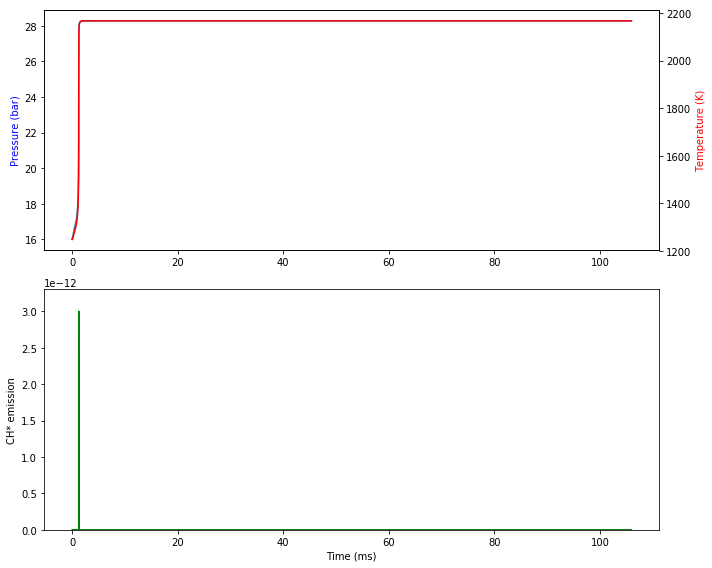

At 1250.0 K 16 bar, ignition delay time is 1.2464571968077893 ms


In [24]:
get_ignition_delay_air_n2(1000/0.8, 16, 1, plot=True)
plt.rcParams['figure.figsize'] = [10, 8]


In [25]:
DAG_temperatures = 1000/np.linspace(0.70,1.2,25)
pressures_bar = 16
phi = 1

DAG_results = dict()
times = []
for T in DAG_temperatures:
    t = get_ignition_delay_air_n2(T,pressures_bar, phi, plot=False)
    times.append(t)
    DAG_results[pressures_bar] = times

Reached end time 102.41 ms in 5020 steps
At 1428.5714285714287 K 16 bar, ignition delay time is 0.17252993437799144 ms
Reached end time 108.30 ms in 4822 steps
At 1387.2832369942196 K 16 bar, ignition delay time is 0.27612130871170887 ms
Reached end time 100.91 ms in 4906 steps
At 1348.3146067415732 K 16 bar, ignition delay time is 0.4294270600391026 ms
Reached end time 105.23 ms in 4804 steps
At 1311.4754098360656 K 16 bar, ignition delay time is 0.6468745382456124 ms
Reached end time 108.09 ms in 4690 steps
At 1276.595744680851 K 16 bar, ignition delay time is 0.9428379796520737 ms
Reached end time 103.29 ms in 4386 steps
At 1243.5233160621763 K 16 bar, ignition delay time is 1.3328931282843046 ms
Reached end time 108.87 ms in 4394 steps
At 1212.1212121212122 K 16 bar, ignition delay time is 1.8384904830735609 ms
Reached end time 105.12 ms in 4459 steps
At 1182.266009852217 K 16 bar, ignition delay time is 2.4927199615512317 ms
Reached end time 104.58 ms in 4359 steps
At 1153.8461538

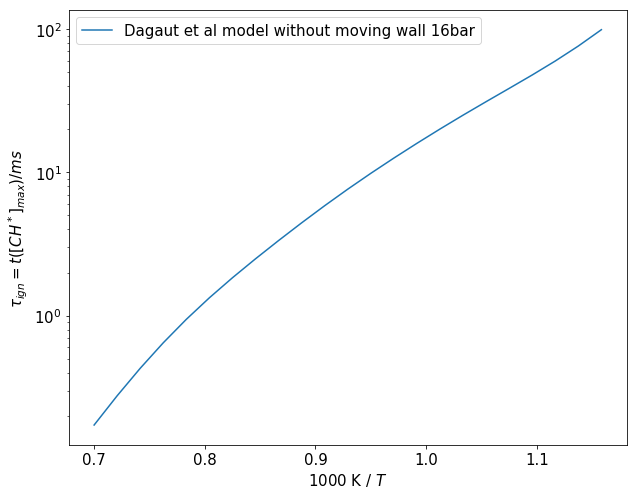

In [56]:
plt.semilogy(1000/DAG_temperatures,times,label='Dagaut et al model without moving wall {}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]



In [62]:
import os
filename = "/Users/ebubeajulu/Code/GTL/ic8_ignition_delay_Dagaut_without_moving_wall.pkl"
os.makedirs(os.path.dirname(filename), exist_ok=True)

with open('ic8_ignition_delay_Dagaut_without_moving_wall.pkl', 'wb') as f:
    pickle.dump((DAG_temperatures, DAG_results[pressures_bar]), f)

In [28]:
import pickle
with open('ic8-LLNL.pkl','rb') as fp:
    (LLNL_temperatures, LLNL_results) = pickle.load(fp)

In [29]:
import pickle
with open('ic8-RMG.pkl','rb') as fp:
    (RMG_temperatures, RMG_results) = pickle.load(fp)

In [37]:
predict_ic8 = """0.657614                 0.0438935
0.660053                 0.0508193
0.668666                 0.0605986
0.674810                 0.0712038
0.682193                 0.0824521
0.690803                 0.0997690
0.695710                 0.117224
0.705556                 0.141850
0.712933                 0.169140
0.722793                 0.193028
0.730166                 0.233559
0.740019                 0.274467
0.748628                 0.332111
0.759721                 0.384622
0.765868                 0.445364
0.775710                 0.546873
0.786810                 0.615061
0.799138                 0.712339
0.806515                 0.849383
0.818843                 0.983721
0.829936                 1.13926
0.843501                 1.31950
0.852120                 1.52800
0.864449                 1.76967
0.878014                 2.04964
0.889110                 2.33921
0.900212                 2.59264
0.910061                 3.09168
0.927338                 3.52918
0.935965                 3.96890
0.942116                 4.52889
0.958153                 5.24581
0.969245                 6.07524
0.985293                 6.73451
0.993909                 7.91373
1.00872                  8.90155
1.02476                  9.86753
1.03338                  11.4268
1.04572                  12.8521
1.06423                  14.6714
1.07409                  16.9904
1.08520                  18.5574
1.10124                  21.1825
1.11357                  23.4784
1.12466                  27.5917
1.13824                  30.1389
1.14933                  35.4191
1.16290                  39.8386
1.17523                  46.1394
1.18633                  51.8925
1.19865                  61.8858
1.20728                  68.5850
1.21961                  80.6040
1.23070                  94.7255
"""

ign_times = []
temps = []

for k in predict_ic8.splitlines():
    temp, ign_time = k.split()
    temps.append(float(temp))
    ign_times.append(float(ign_time))
    
ign_times = np.array(ign_times)
temps = np.array(temps)

In [34]:
experiment_ic8 = """ 0.742197            0.129438
0.792731            0.238540
0.858775            0.582623
0.897119            1.02386
0.916046            1.35725
1.01424             4.07608
1.05446             8.48794
1.08368             10.3738
1.11478             15.2007
1.16585             24.9217
1.17410             28.0282
1.18433             30.0848
"""

exp_ign_times = []
exp_temps = []



for z in experiment_ic8.splitlines():
    exp_temp, exp_ign_time = z.split()
    exp_temps.append(float(exp_temp))
    exp_ign_times.append(float(exp_ign_time))
    
exp_ign_times = np.array(exp_ign_times)
exp_temps = np.array(exp_temps)



<function matplotlib.pyplot.show(*args, **kw)>

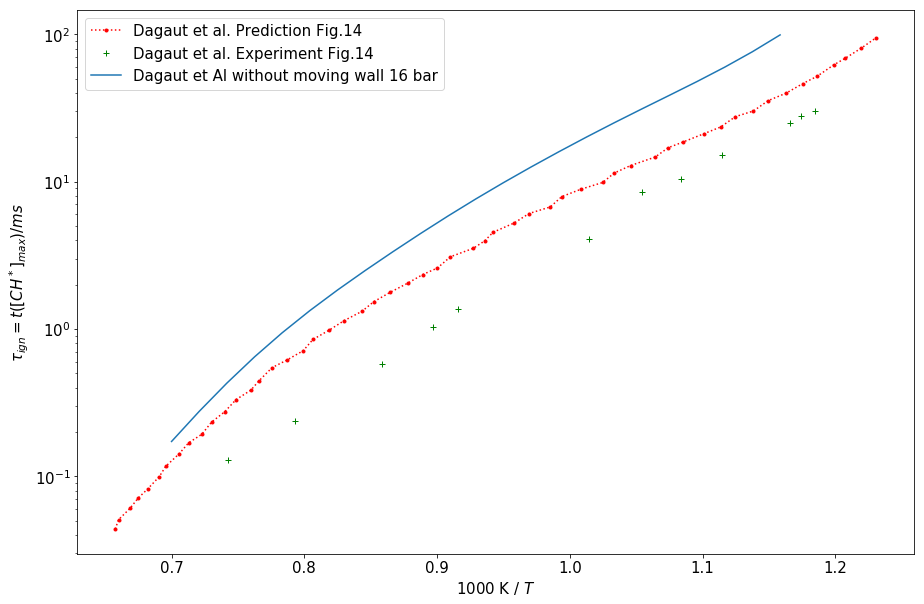

In [45]:
plt.rcParams.update({'font.size': 15})

# plt.semilogy(1000/LLNL_temperatures,LLNL_results[pressures_bar],label='LLNL {}bar'.format(pressures_bar))
# plt.legend(loc='best')
# plt.xlabel('1000 K / $T$')
# plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')


# # plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='RMG {}bar'.format(pressures_bar))
# # plt.legend(loc='best')
# # plt.xlabel('1000 K / $T$')
# # plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')

plt.semilogy(temps,ign_times, 'r.:',label='Dagaut et al. Prediction Fig.14'.format(pressures_bar))

plt.semilogy(exp_temps,exp_ign_times, 'g+', label='Dagaut et al. Experiment Fig.14'.format(pressures_bar))

plt.semilogy(1000/DAG_temperatures,times,label='Dagaut et Al without moving wall {} bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [15, 10]

plt.show